In [1]:
# Homework 4 assignments

#### 1.Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain how variables in each set of data are related. Plot each set using the scatter plot function and the line graph function.



In [2]:
# 1. First I have to save the plots functions using Spyder which is used to visual the data 

In [3]:
# plots.py
# os library or module allows you to access commandline function
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.transforms as mtransforms

# matplotlib is all the plotting tools
# we create a function that plots a scatter as a timeseries 
# this is one way to visualize data
# it is just a scatter plot and then we represent year with color 
# in the book, we represent the color as multiple variables 

def plot_ts_scatter(df, s = 75, figsize = (40, 20), 
                    save_fig = False, pp = None):

# gather variables from dateframe 
 plot_vars = list(df.keys())
 # we have our plot variables which are just the keys we are passing 
 # a whole data frame or a slice of the dataframe 

# cycle through each variable for x value 
 for x in plot_vars:
 # we cycle through the plot variables 
 # cycle again for y value 
       for y in plot_vars:
# make sure that  x does not equal y 
           if x != y:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                # years are the color value 
                # we are going to draw the years from the index, but we can 
                # just create a year value in the dateframe to say if you are not 
                # in the data, not in the keys 
                
                # Var3 also called Z means year 
                # replace in python using Control R 
                
                # this is to check if we have made a column called year 
                if "Year" not in df.keys():
                    # create list from index
                    # convert each index value to string 
                    # only include first 4 characters, which is the year 
# this says we create data for the year and draw that data from a list 
# the list is composed of elemments from the index,so create the lists from index 
# the lists also include time, turn that index data into a string 
# from that string, we take the first 4 chacters which is the year 
# create an integer from those chacters, in another word, convert it back to 
# a numeric, the reason why we have to do becuase index is a special format 

# this is the most complicated part of this section is getting the year 
# to format correctly 

# if we have not made a column called year, we have to make a column 
# if we did, we can skip 
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 

                df.plot.scatter(x = x, y = y, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                
                # Turn the text on the x-axis so that it reads vertically
                # we do not want them to be horizontal and rotate them 90 degrees 
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
# this says on both x and y both make the length as 0 and the line disappear 
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    # try to create a new folder 
                    try:
                        os.mkdir("plots")
                        # if it does not exist, we just move on 
                    except:
                        pass
                    # save the figure in the folder 
                    # identify directory to save fiture 
                    
                    directory = "plots/" + x[:12] + " " + y[:12] + " c=Year"
                    plot.savefig()
                    plt.savefig(directory + ".png")
# we save the figure in a PDF
# this says you pass the pdf which means pp here, if it does not equal none
# if you pass someting do it and then save the figure in the PDF 
# it says if you pass the pdf file which is pp here and if it does not equal to none 
# if you pass something and then save the figure in the pdf 
# the reason why save as a pdf instead of png is that it holds all of the files 
# if want to view different files, it is just a matter of pressing left or right 
# and then we can view the change over time, this is nice way to navigate and understand the data 
# when we relate to the reaserch, before we do the regression, plot the data first to show the correlation 
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [4]:
# download data from FRED using pandas_datareader
# this part of code is saved as Fred.py using Spyder 
# this Fred and Plots both are saved under the folder Datalib 

In [5]:
# Fred data introduction 
# Federal Reserve Economic Data (FRED) is a database maintained by the Research division of the Federal Reserve Bank of St. Louis 
# we can use this source to download, graph, and track 766,000 US and international time series from 101 sources.

In [6]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, 
                end = datetime.datetime.today(),freq = "A"):
    # check if new column is first column of data
    # if true, then create a new dataframe
    i = 0
    for key, code in data_codes.items():
        if i == 0:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            # rename column so that code is replaced by the key (variable name)
            df.rename(columns = {code:key}, inplace = True) 
            i = None
        else:
            # if DataFrame exists, add new column
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df
# if not, add to existing dataframe

In [7]:
# Next is to pick the data we would download 

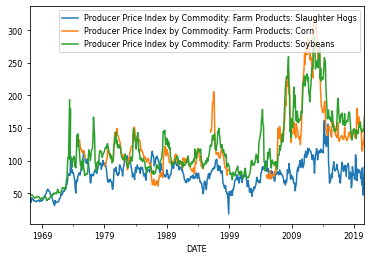

In [8]:
#fedProject.py
#from datlib.stats import *
# from datlib.plots import *
# from datlib.FRED import *
# the key is the column name and the val is about to set 
data_codes  = {"Producer Price Index by Commodity: Farm Products: Slaughter Hogs": "WPS0132",
               "Producer Price Index by Commodity: Farm Products: Corn ": "WPS012202",
               "Producer Price Index by Commodity: Farm Products: Soybeans":"WPU01830131" }
# Select start and end dates
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")
plt.rcParams.update({"font.size":8})
data.plot.line()

#####  this shows there is  strong  correlation between hogs price and corn and soybean.
#### The three variables have almost the same trend. an increase about corn and soynbean will result in the increase of hog prices. 
##### Also there is larger fluctuation about corn and soybean than hog prices, that is why when
####  when the price of soybean and corns increase, the pice of hogs will increase largely 

In [9]:
data

,Producer Price Index by Commodity: Farm Products: Slaughter Hogs,Producer Price Index by Commodity: Farm Products: Corn,Producer Price Index by Commodity: Farm Products: Soybeans
DATE,,,
1967-01-31,42.0,NaN,48.5
1967-02-28,38.9,NaN,47.1
1967-03-31,37.9,NaN,47.5
1967-04-30,36.0,NaN,47.1
1967-05-31,42.9,NaN,46.9
...,...,...,...
2020-05-31,88.8,114.6,144.2
2020-06-30,53.9,121.8,146.1
2020-07-31,47.0,129.9,148.4


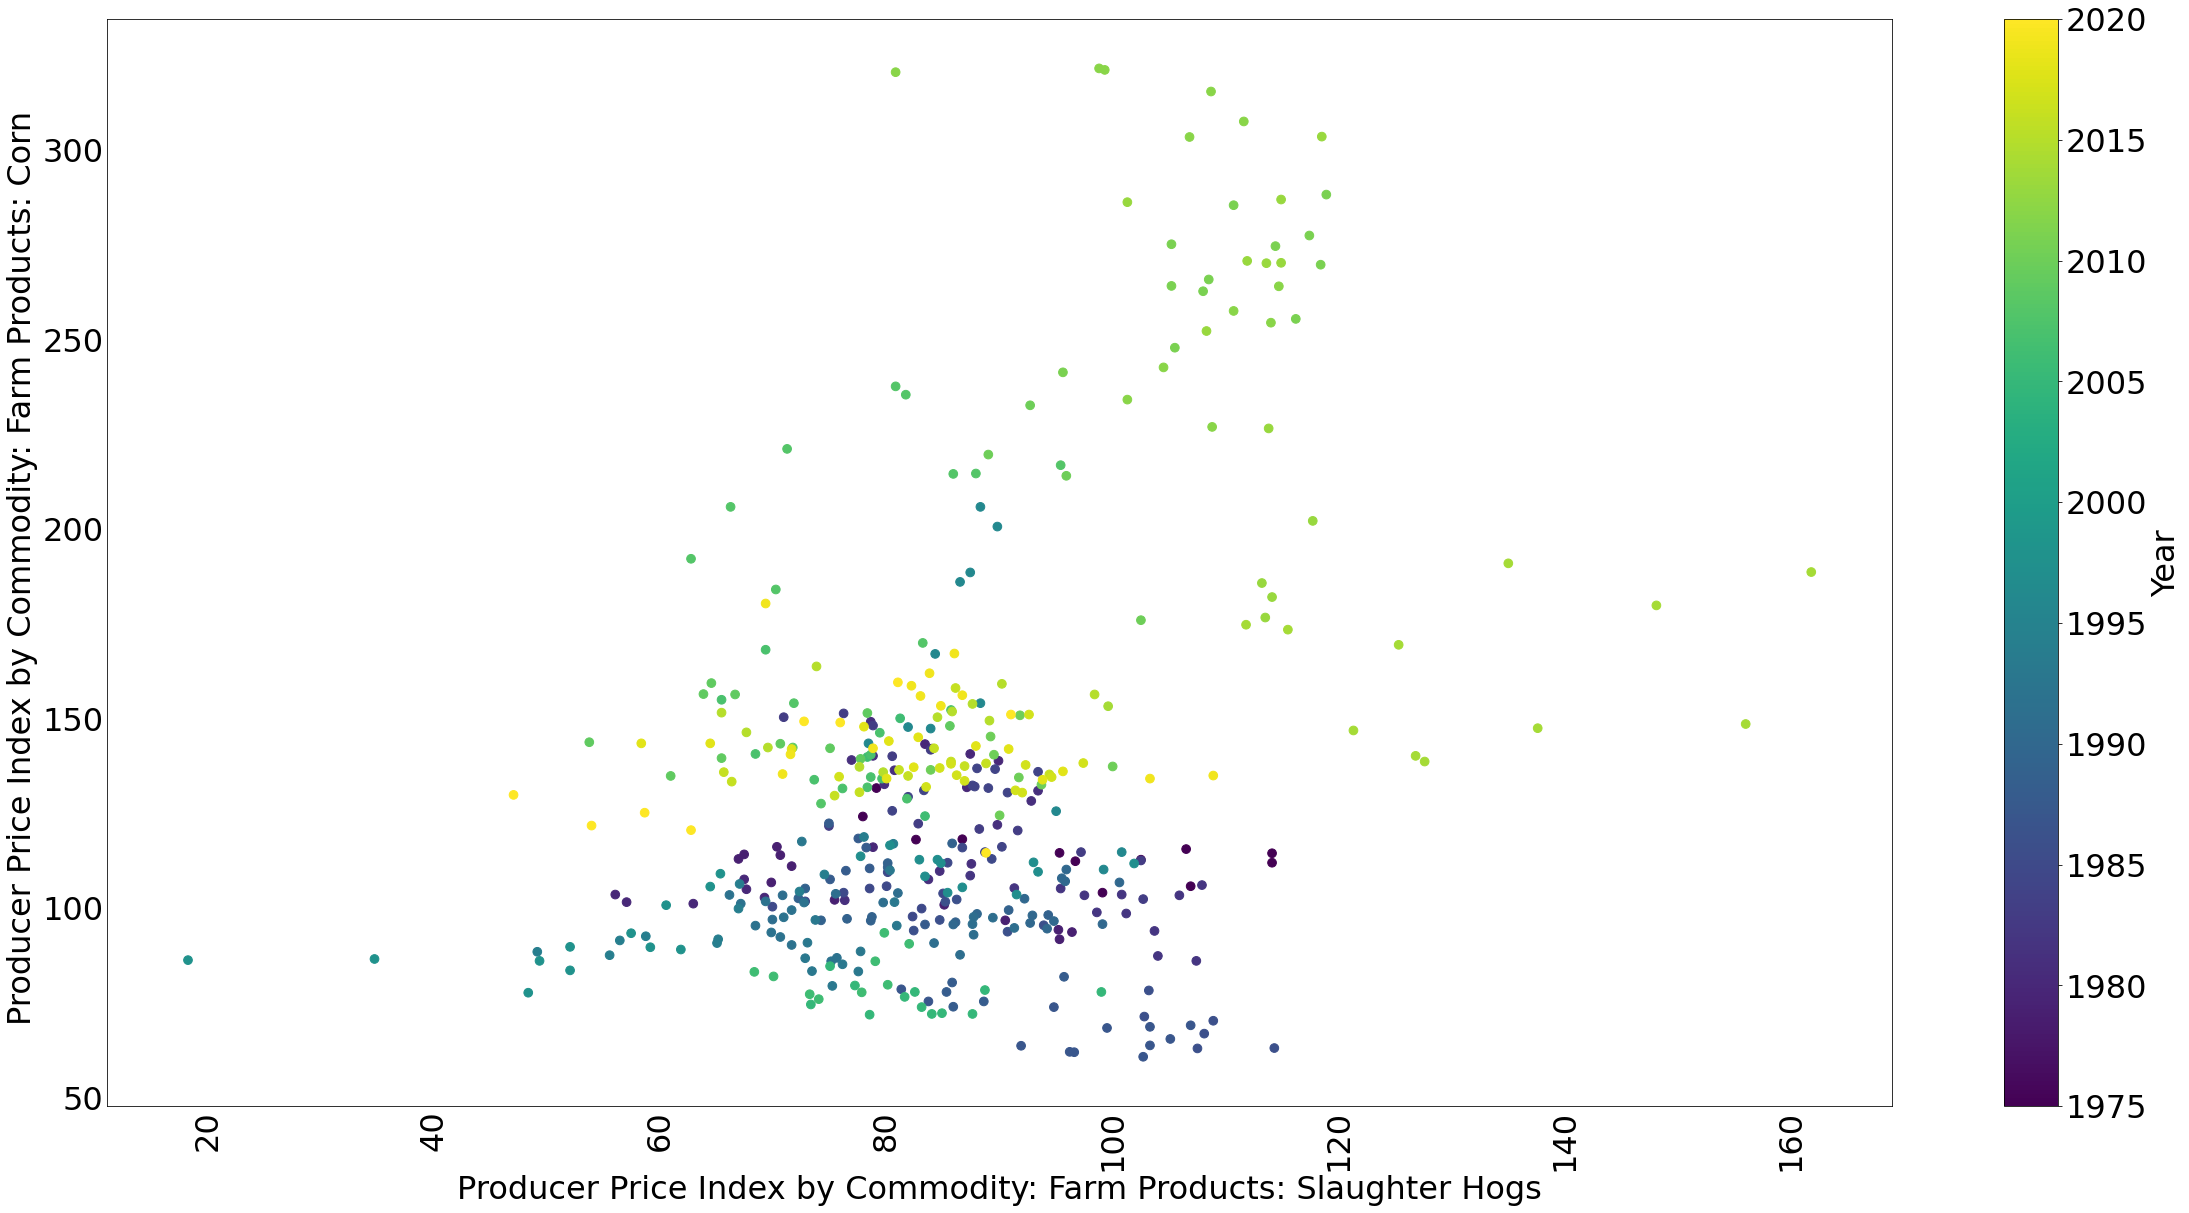

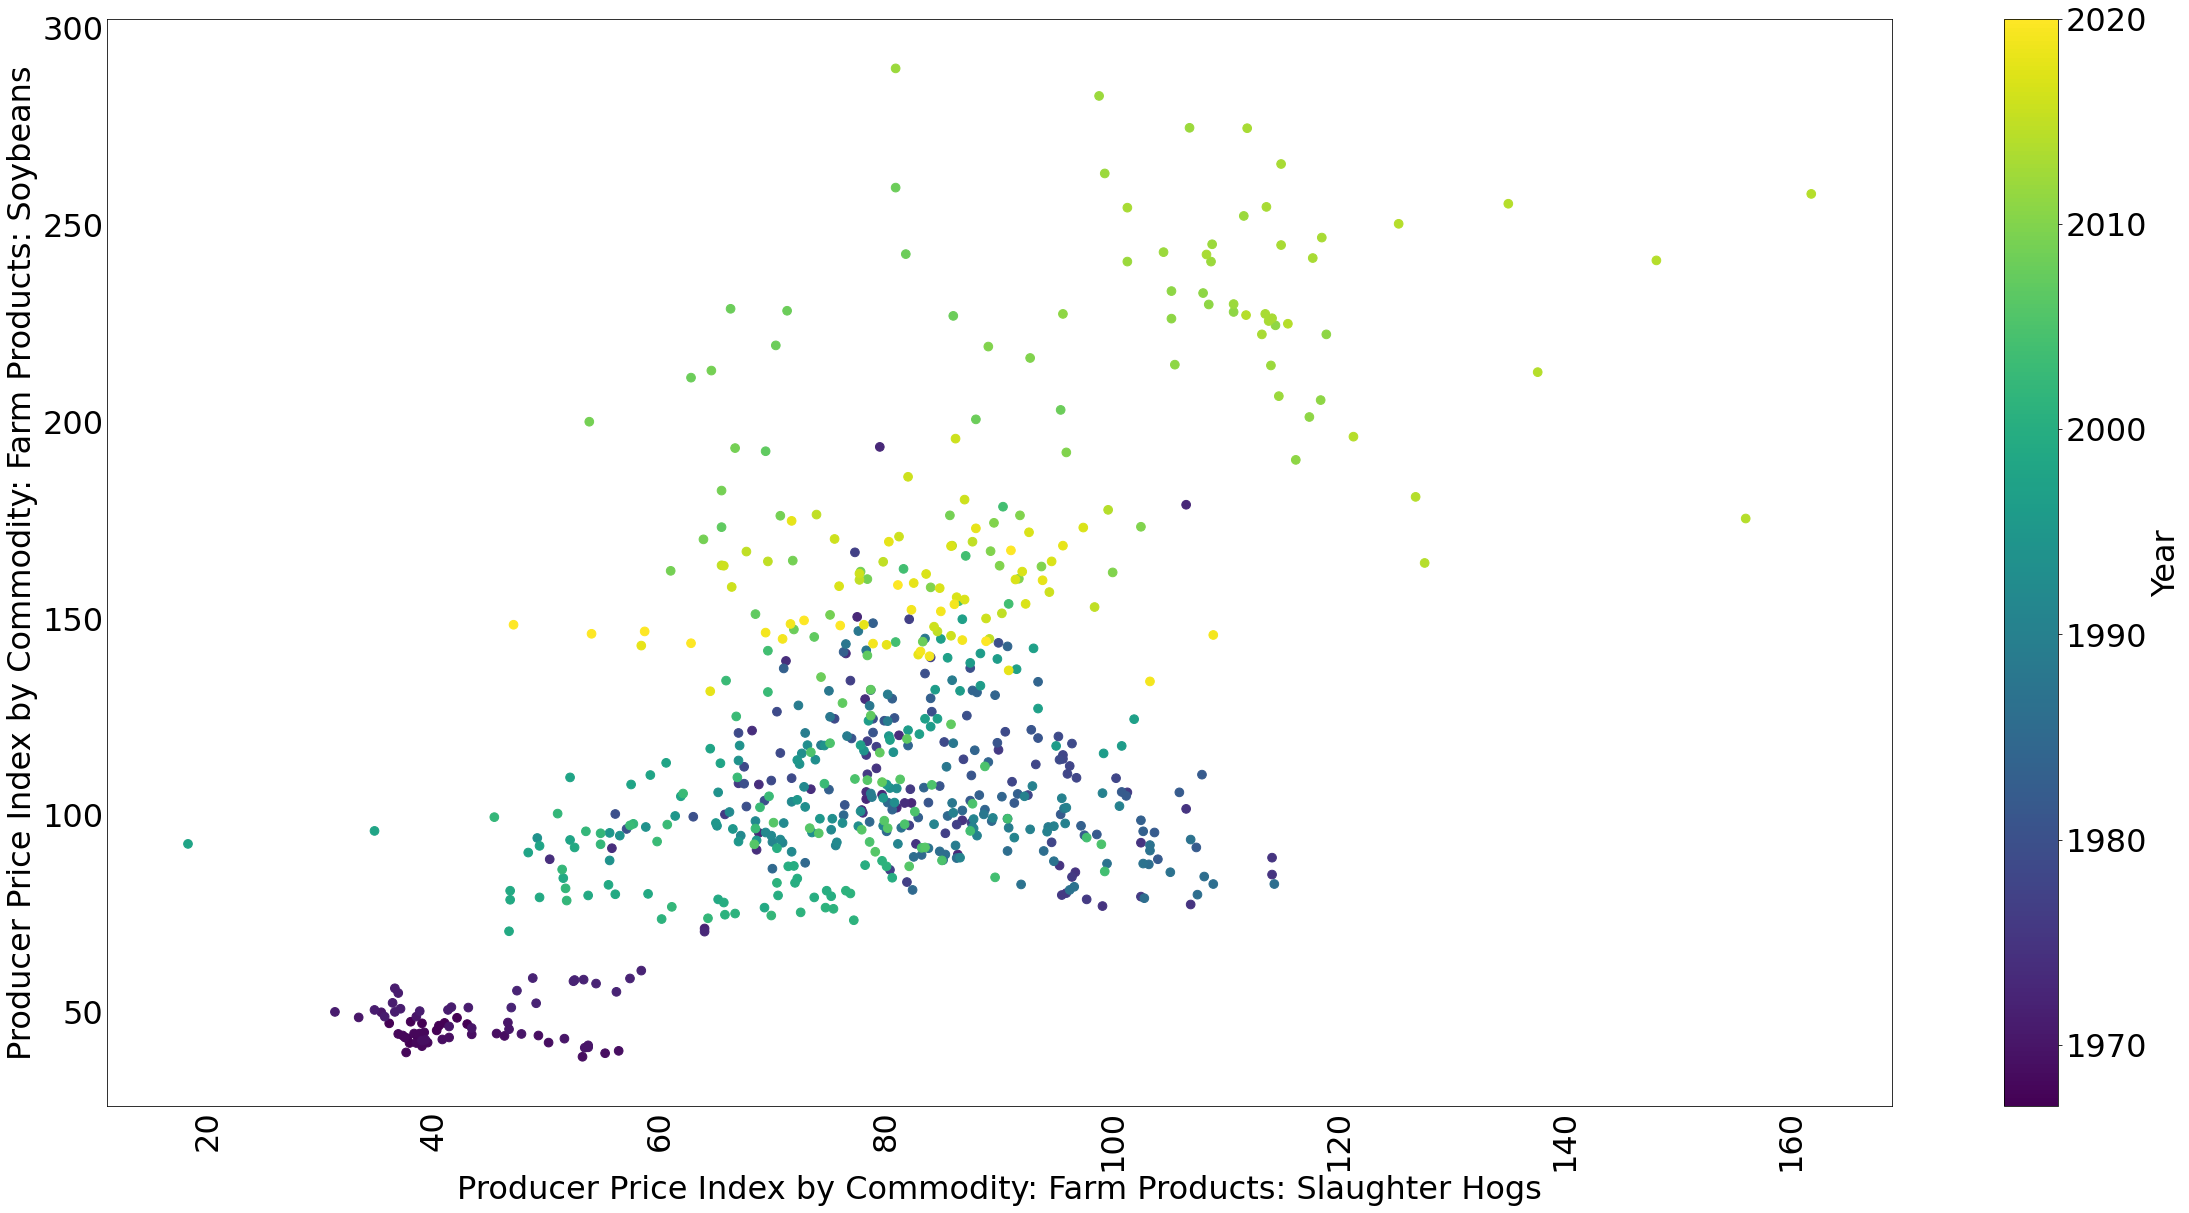

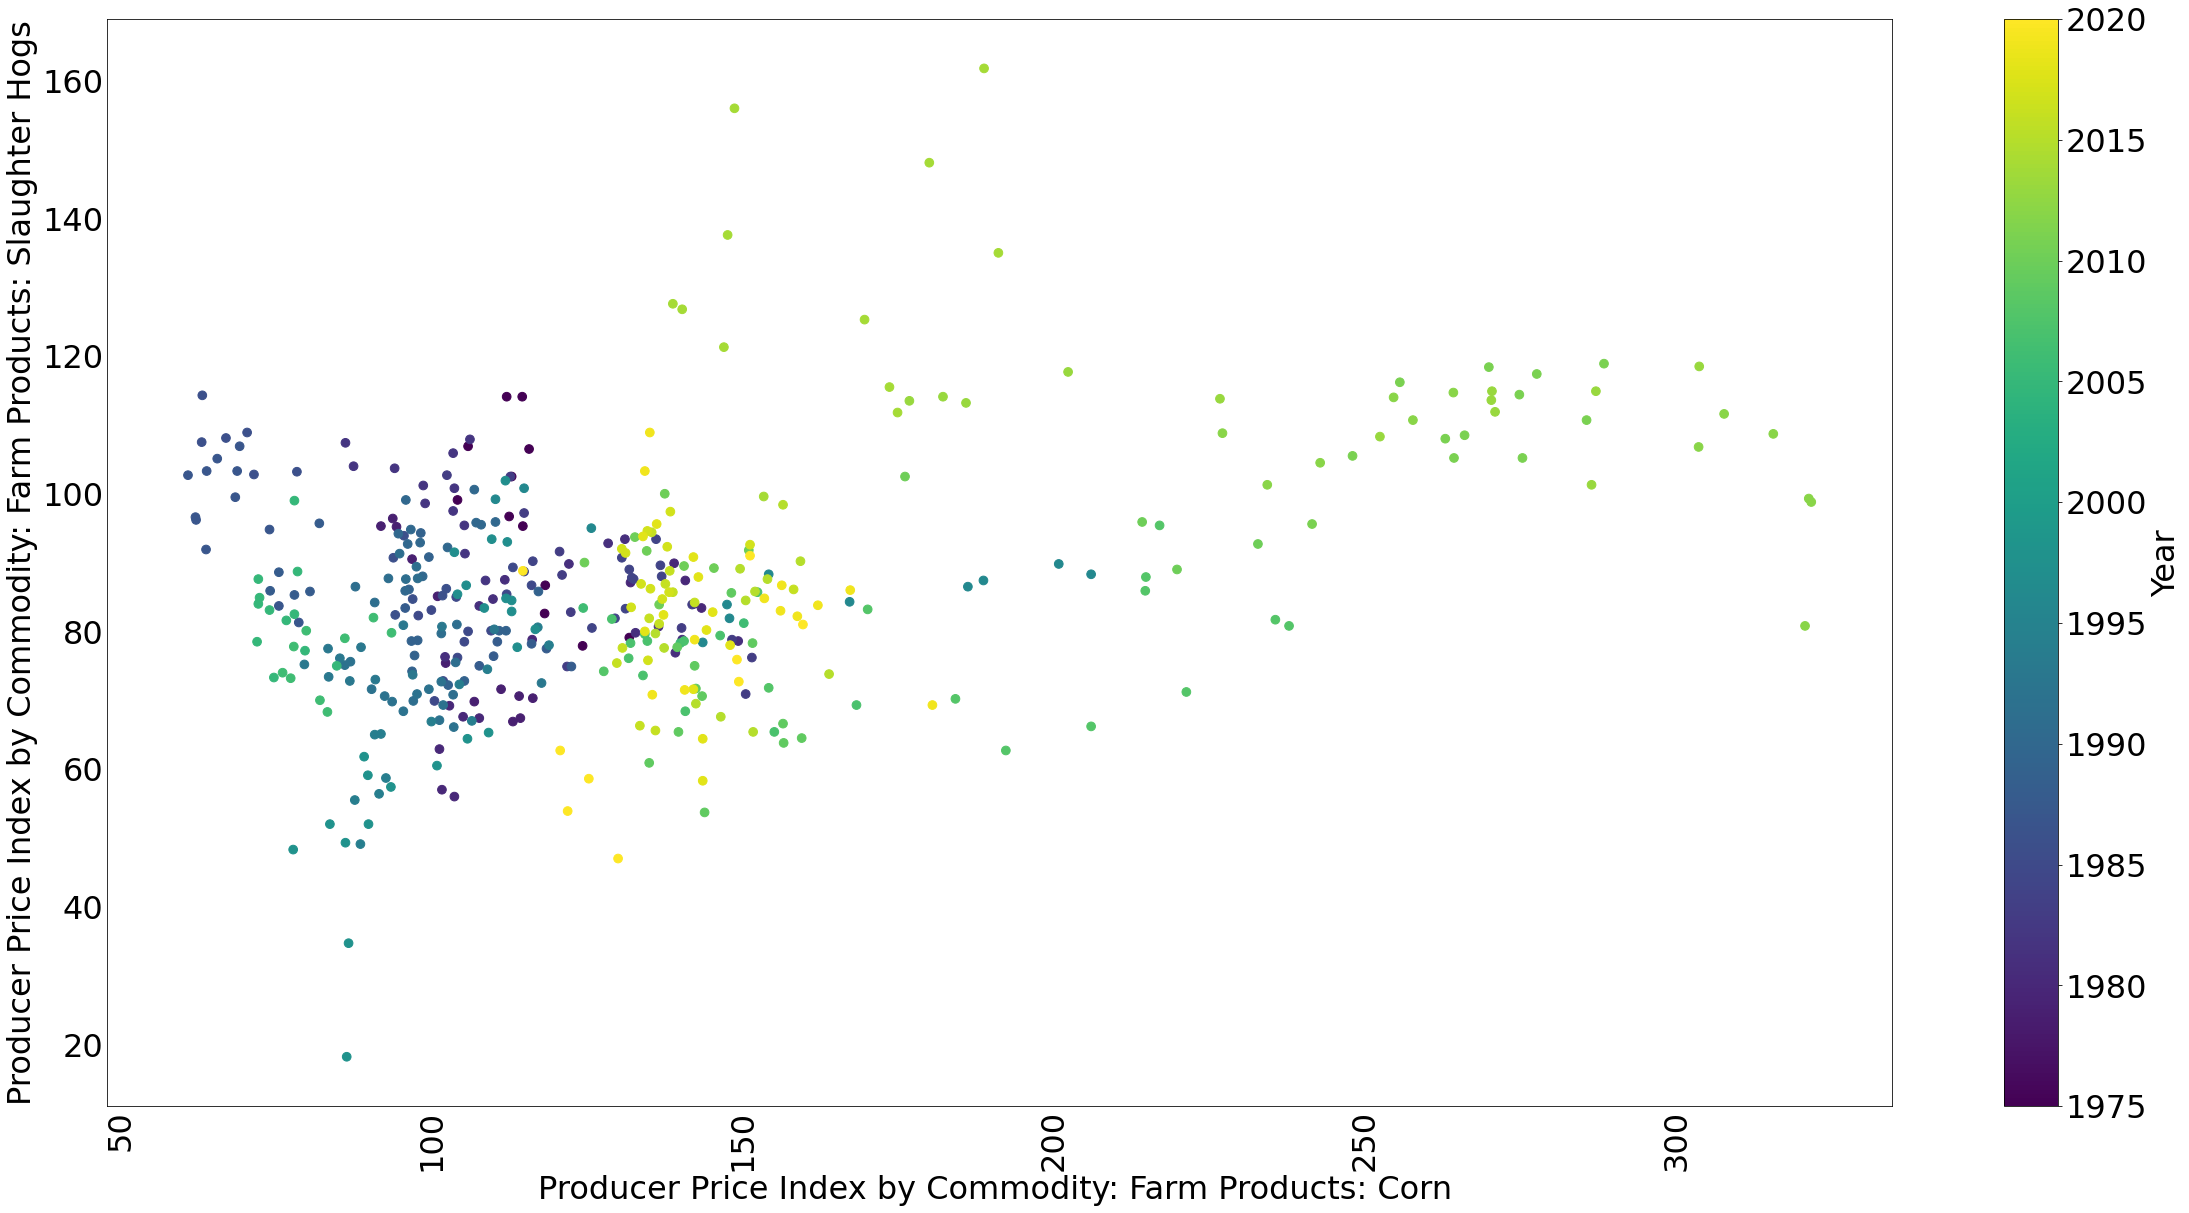

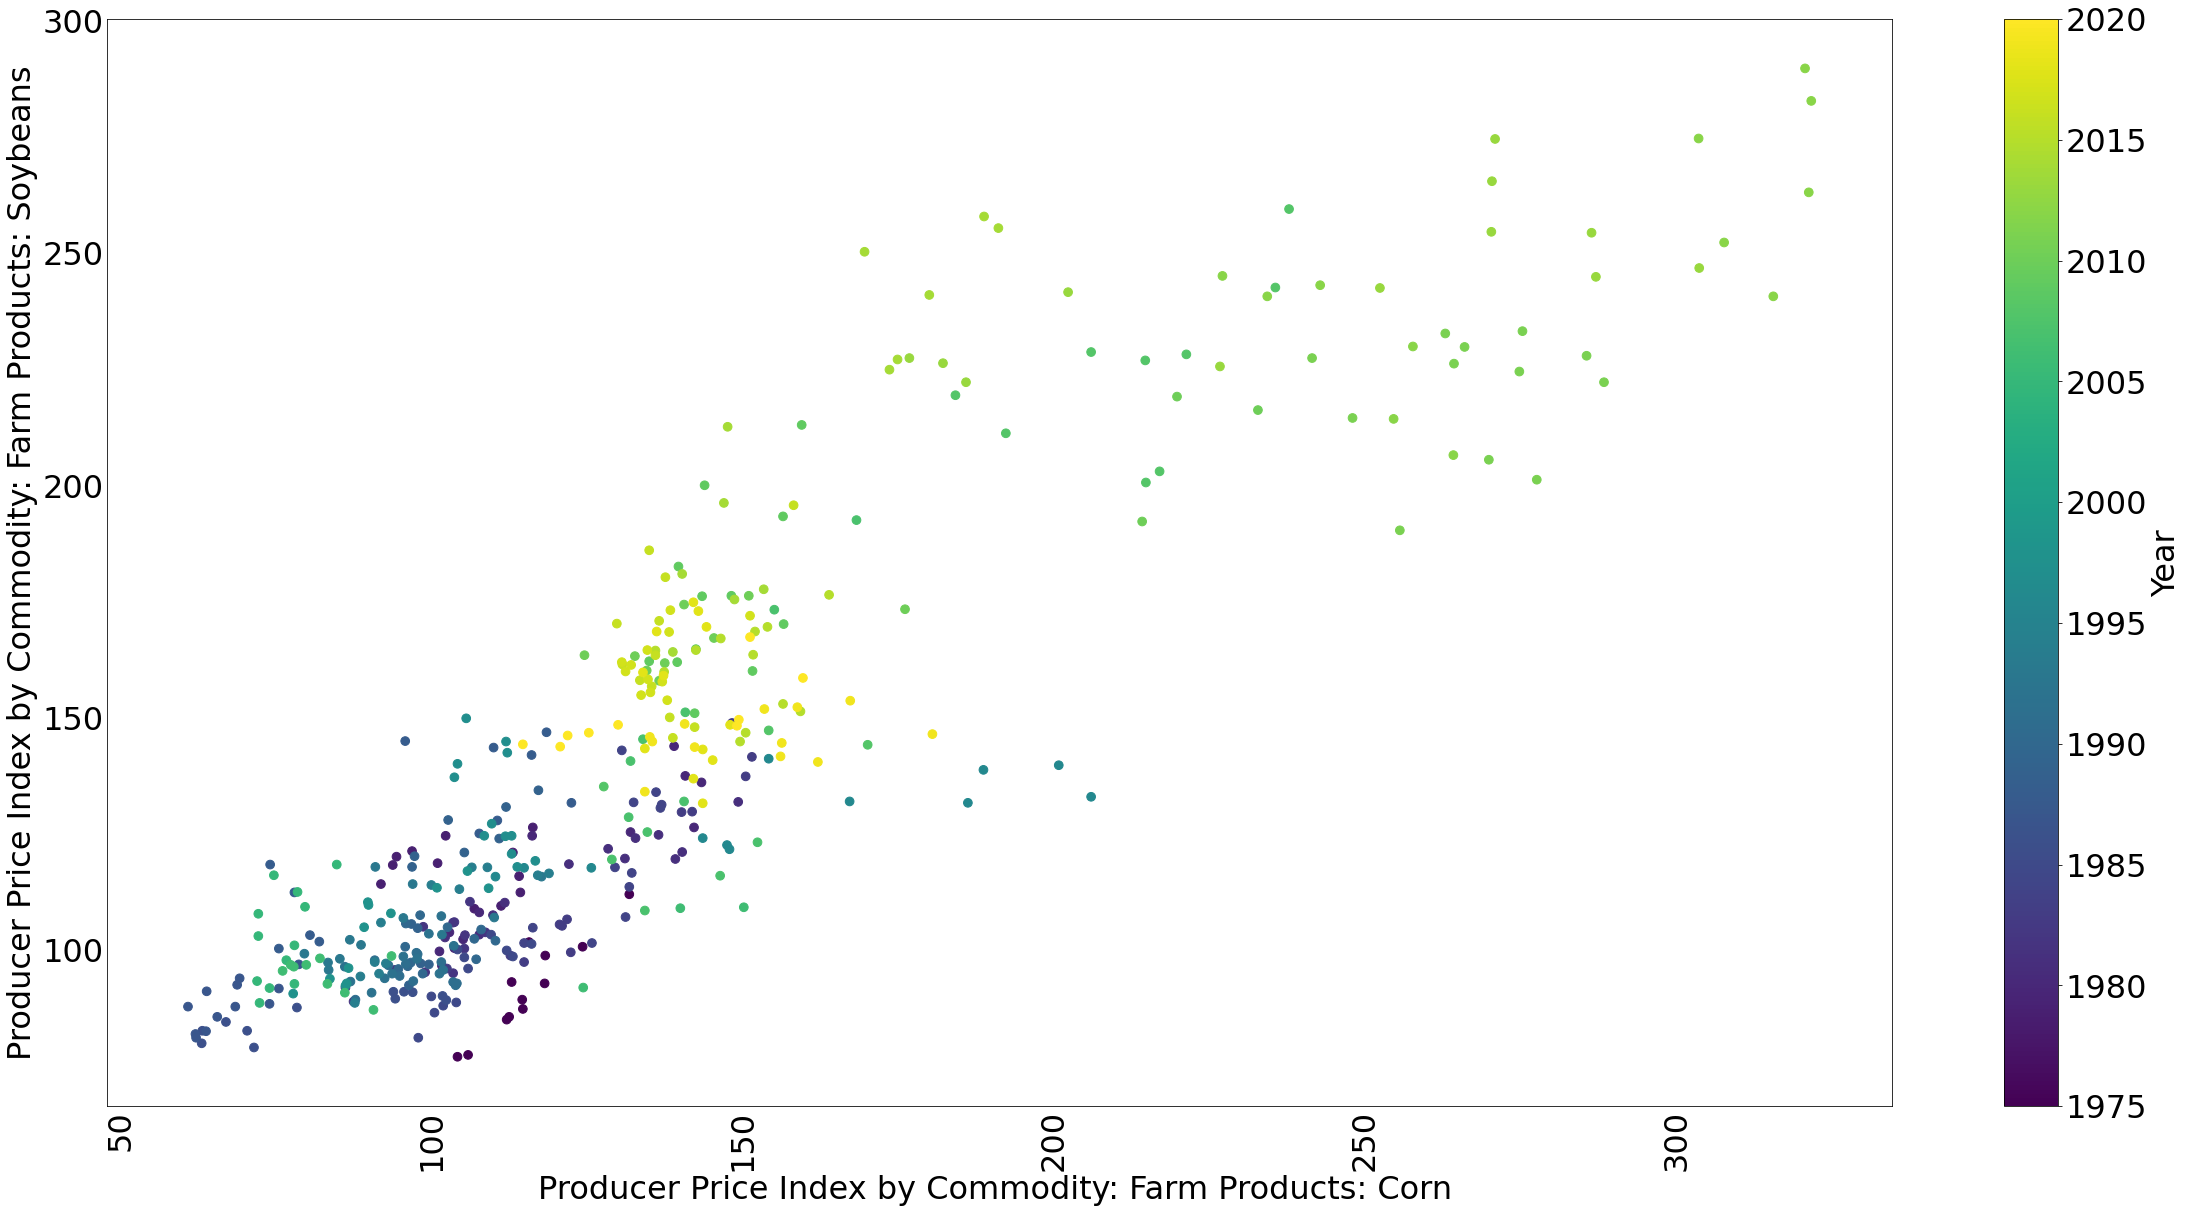

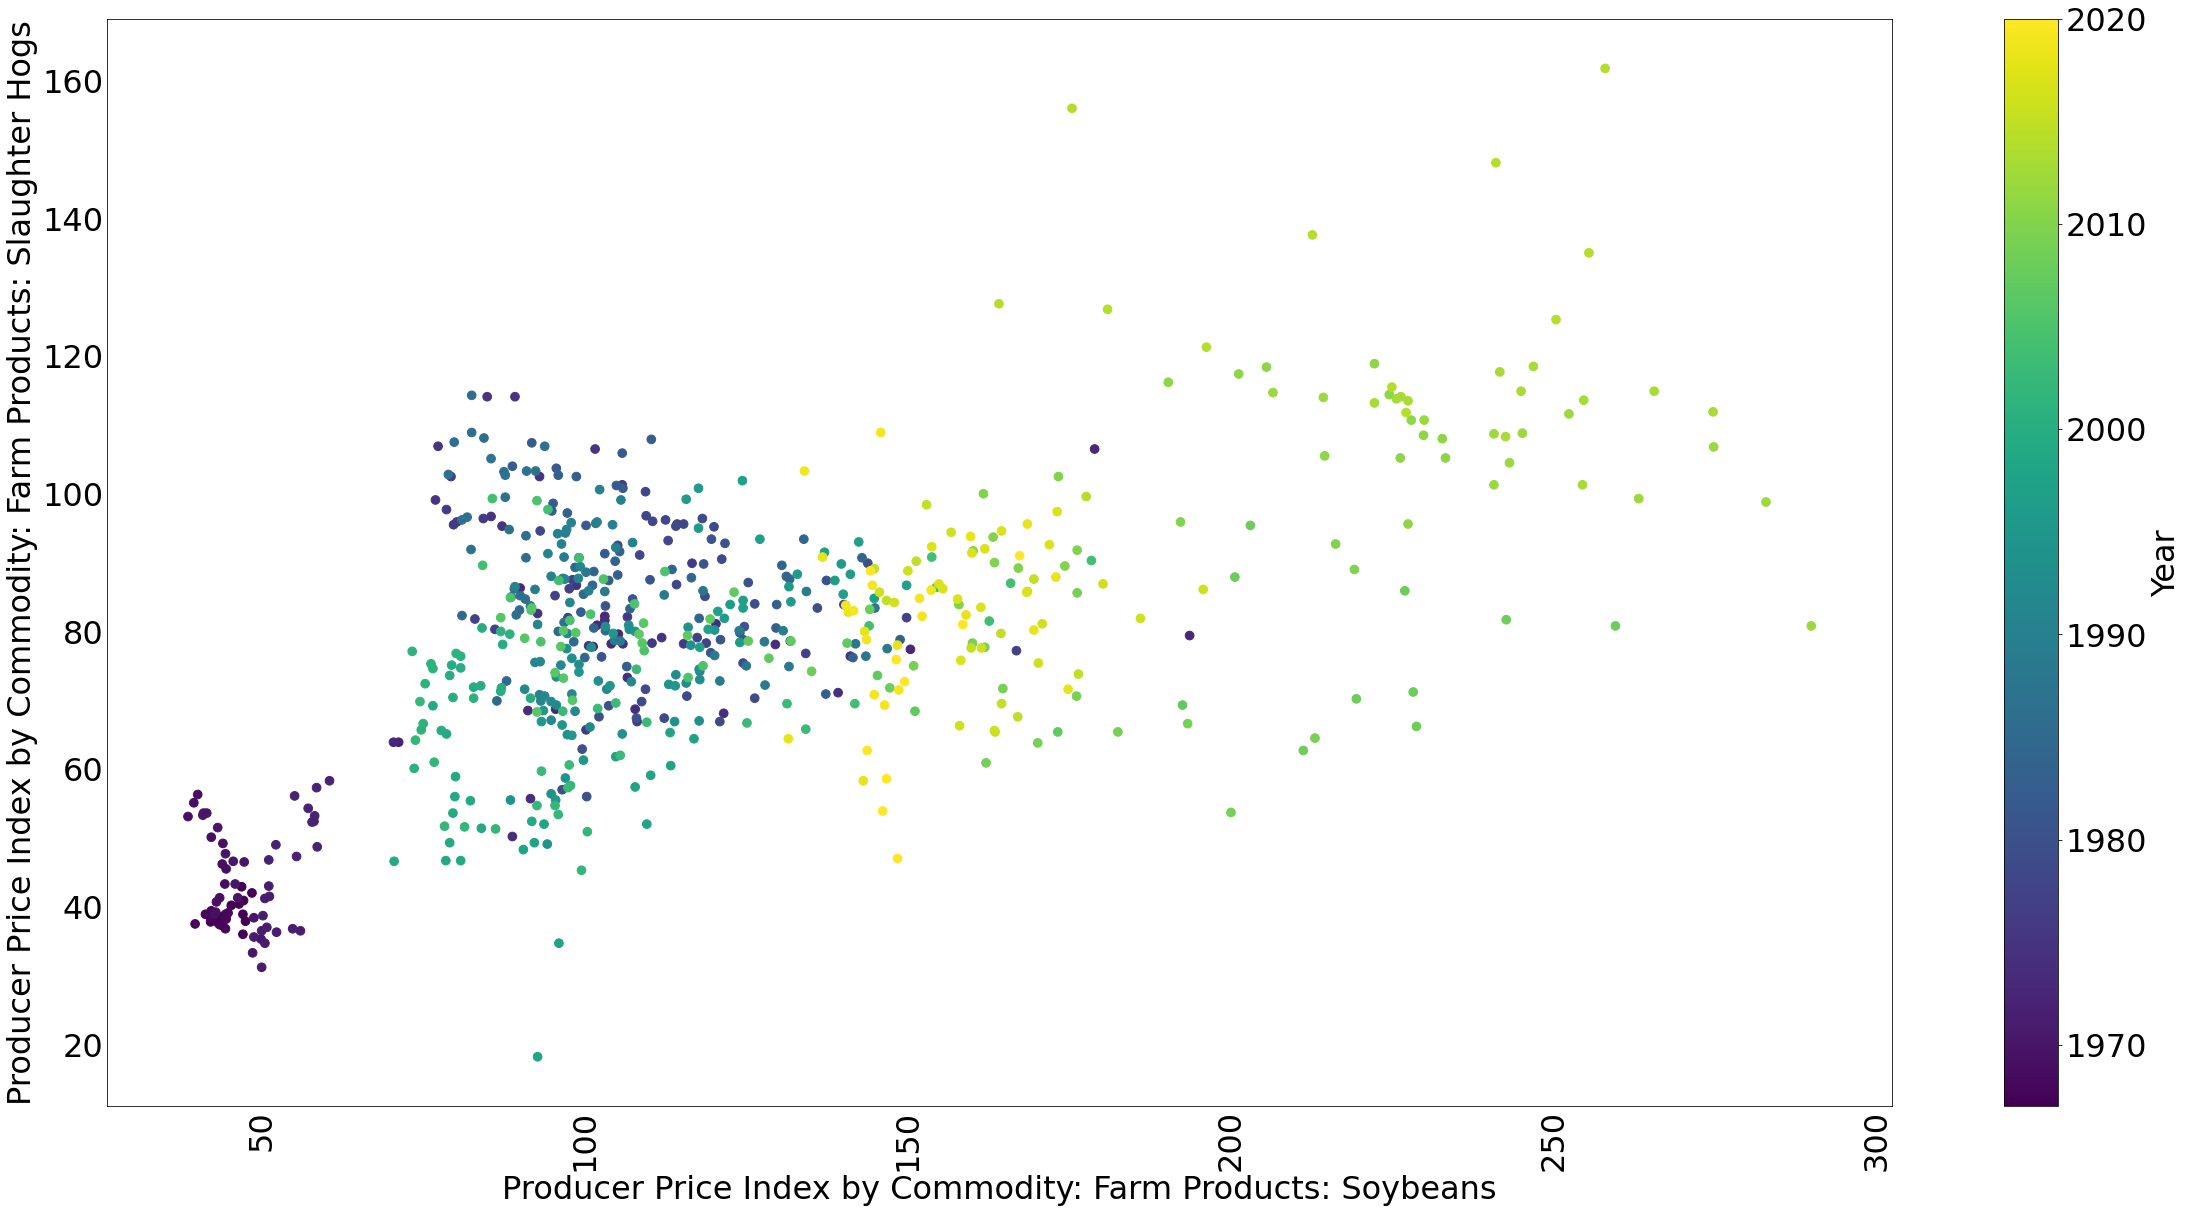

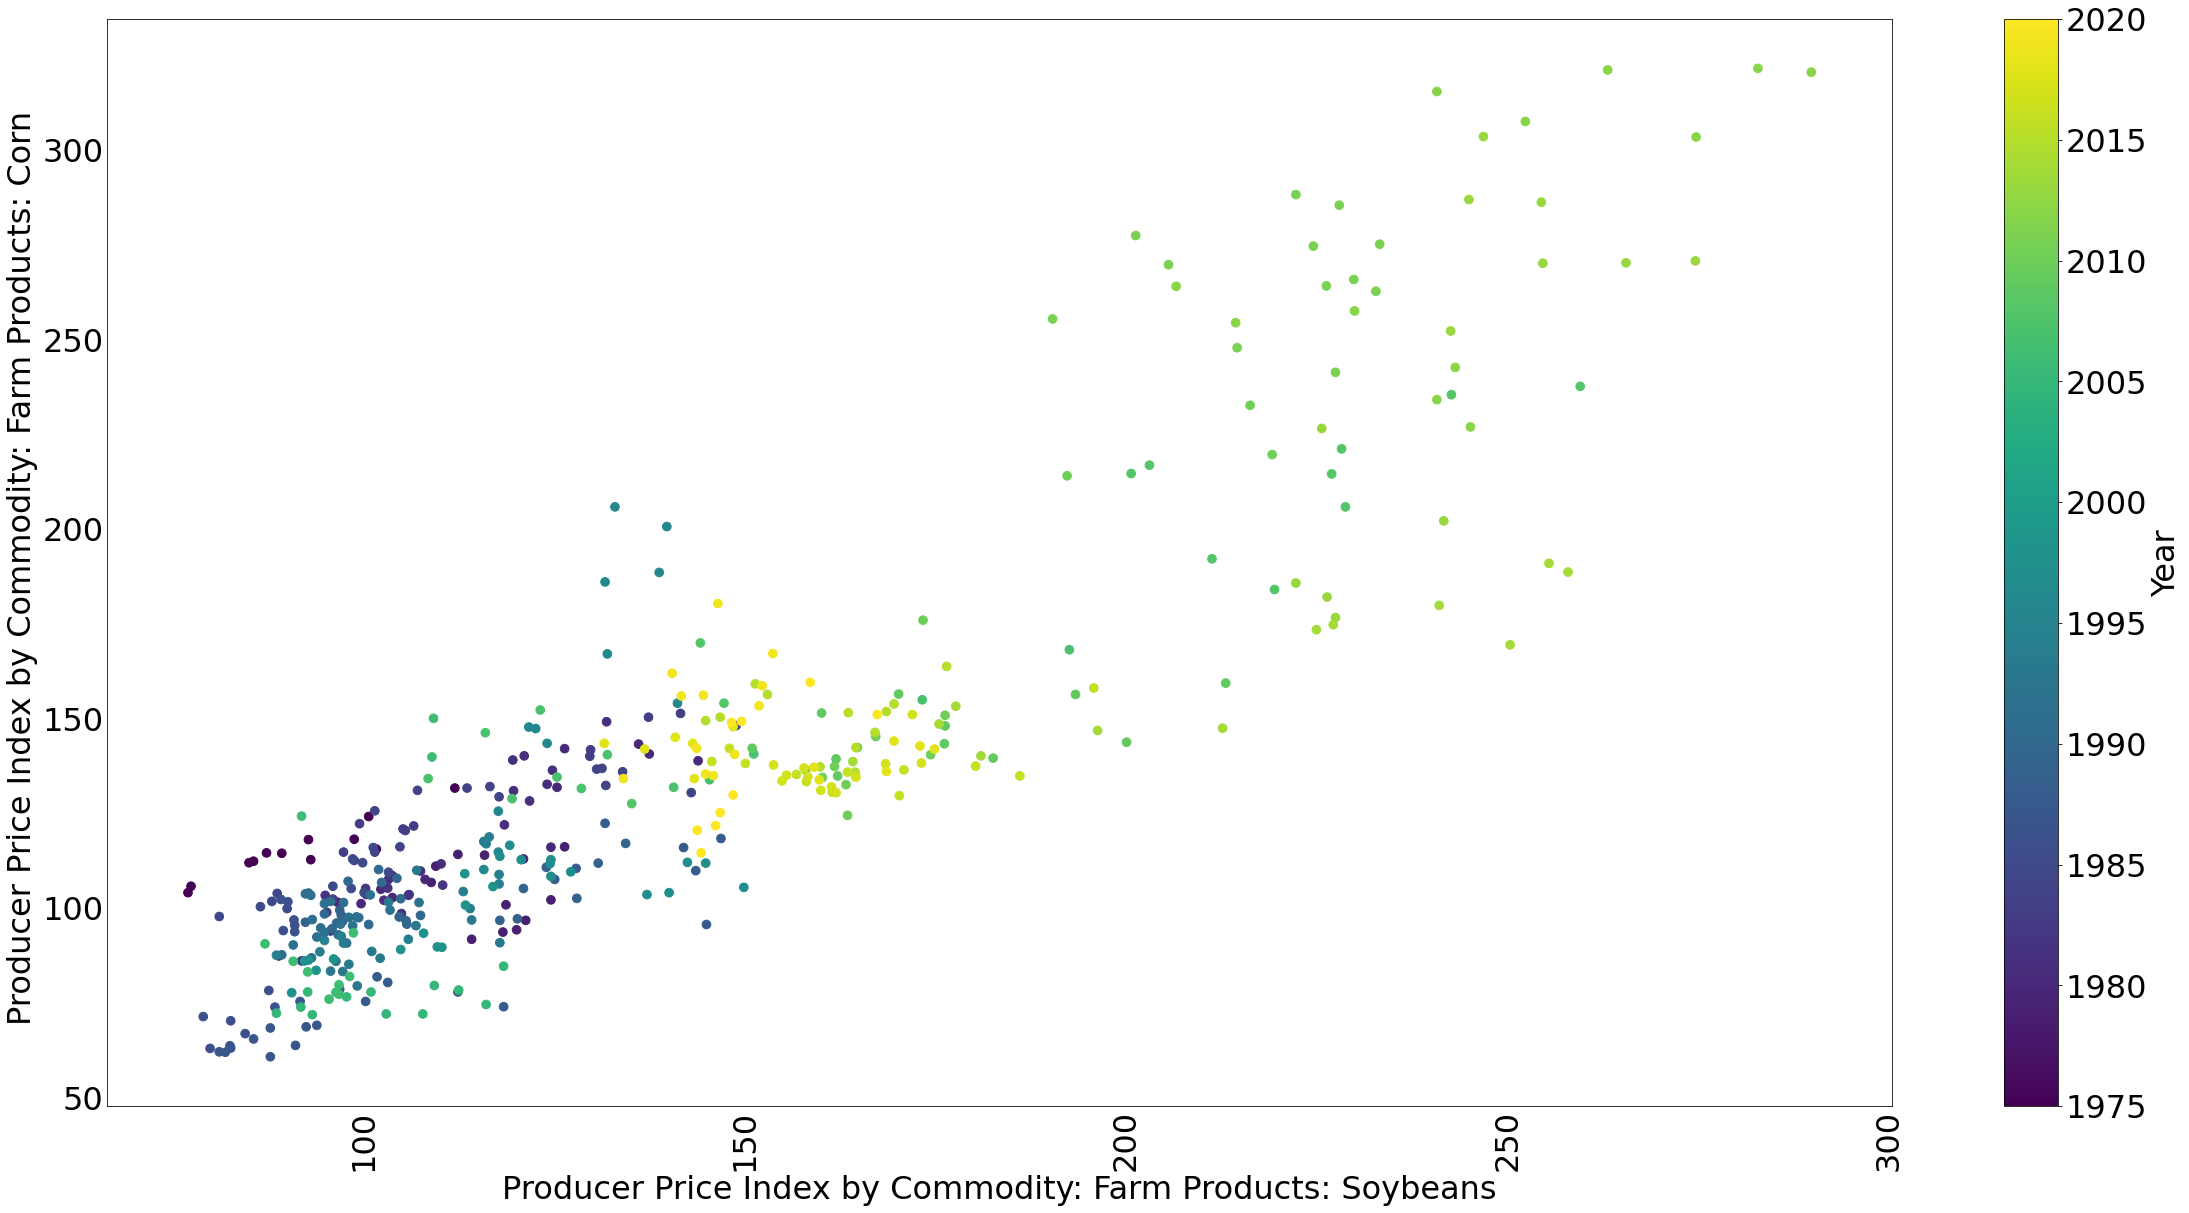

In [10]:
plt.rcParams.update({"font.size":32})
plot_ts_scatter(data)

#### 2.Create a correlation matrix plot for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation for as large of a date range as possible. Then, calculate the year-over-year percent change for each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.¶

#### Differences Between the GDP Deflator and CPI
#### The first is that GDP Deflator includes only domestic goods and not anything that is imported.  This is different because the CPI includes anything bought by consumers including foreign goods.  The second difference is that the GDP Deflator is a measure of the prices of all goods and services while the CPI is a measure of only goods bought by consumers. 

In [11]:
# gather data
GDP_codes = {"Gross Domestic Product": "GDP",
             "Real Gross Domestic Product": "GDPC1",
             "Consumer Price Index for All Urban Consumers: All Items in U.S. City Average": "CPIAUCSL",
             "Currency in Circulation": "CURRCIR"}

start = datetime.datetime(1980,1, 1)
end = datetime.datetime.today()

GDP_Data = gather_data(GDP_codes,
                  start = start,
                  end = end,
                  freq = "Q").dropna()

GDP_Data

,Gross Domestic Product,Real Gross Domestic Product,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,Currency in Circulation
DATE,,,,
1980-03-31,2789.842,6837.641,79.033333,122.483667
1980-06-30,2797.352,6696.753,81.700000,125.111667
1980-09-30,2856.483,6688.794,83.233333,129.226667
1980-12-31,2985.557,6813.535,85.566667,133.348667
1981-03-31,3124.206,6947.042,87.933333,133.050667
...,...,...,...,...
2019-09-30,21540.325,19141.744,256.324667,1752.891667
2019-12-31,21747.394,19253.959,257.832333,1783.115333
2020-03-31,21561.139,19010.848,258.607667,1807.014667


In [12]:
#### Caculate the year-over-year percent change for each variable and save the results as variables in the same dataframe. 

In [13]:
GDP_codes = {"Gross Domestic Product": "GDP",
             "Real Gross Domestic Product": "GDPC1",
             "Consumer Price Index for All Urban Consumers: All Items in U.S. City Average": "CPIAUCSL",
             "Currency in Circulation": "CURRCIR"}

start = datetime.datetime(1980,1, 1)
end = datetime.datetime.today()

GDP_v = gather_data(GDP_codes,
                  start = start,
                  end = end,
                  freq = "Q").dropna()

GDP_v

,Gross Domestic Product,Real Gross Domestic Product,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,Currency in Circulation
DATE,,,,
1980-03-31,2789.842,6837.641,79.033333,122.483667
1980-06-30,2797.352,6696.753,81.700000,125.111667
1980-09-30,2856.483,6688.794,83.233333,129.226667
1980-12-31,2985.557,6813.535,85.566667,133.348667
1981-03-31,3124.206,6947.042,87.933333,133.050667
...,...,...,...,...
2019-09-30,21540.325,19141.744,256.324667,1752.891667
2019-12-31,21747.394,19253.959,257.832333,1783.115333
2020-03-31,21561.139,19010.848,258.607667,1807.014667


In [14]:
GDP_v.dropna()

,Gross Domestic Product,Real Gross Domestic Product,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,Currency in Circulation
DATE,,,,
1980-03-31,2789.842,6837.641,79.033333,122.483667
1980-06-30,2797.352,6696.753,81.700000,125.111667
1980-09-30,2856.483,6688.794,83.233333,129.226667
1980-12-31,2985.557,6813.535,85.566667,133.348667
1981-03-31,3124.206,6947.042,87.933333,133.050667
...,...,...,...,...
2019-09-30,21540.325,19141.744,256.324667,1752.891667
2019-12-31,21747.394,19253.959,257.832333,1783.115333
2020-03-31,21561.139,19010.848,258.607667,1807.014667


In [15]:
# pct_change for caculating the percentage 
# Percentage change between the current and a prior element.
# Computes the percentage change from the immediately previous row by default. 
# This is useful in comparing the percentage of change in a time series of elements.

In [16]:
# string data is not easy to caculate using a df, better to caculate this one by one 
GDP_v["GDP %"] = GDP_v["Gross Domestic Product"].pct_change(4)*100
GDP_v["GDPC1 %"] = GDP_v["Real Gross Domestic Product"].pct_change(4)*100
GDP_v["CPIAUCSL %"] = GDP_v["Consumer Price Index for All Urban Consumers: All Items in U.S. City Average"].pct_change(4)*100
GDP_v["CURRCIR %"] = GDP_v["Currency in Circulation"].pct_change(4)*100
change_v =["GDP %", "GDPC1 %", "CPIAUCSL %", "CURRCIR %"] 

change = round(GDP_v[change_v], 3)
change.dropna()# drop missing data

,GDP %,GDPC1 %,CPIAUCSL %,CURRCIR %
DATE,,,,
1981-03-31,11.985,1.600,11.261,8.627
1981-06-30,13.054,2.969,9.874,8.834
1981-09-30,14.148,4.326,10.853,7.602
1981-12-31,9.890,1.300,9.583,6.199
1982-03-31,4.804,-2.190,7.582,6.764
...,...,...,...,...
2019-09-30,3.845,2.076,1.764,4.626
2019-12-31,4.005,2.339,2.032,4.917
2020-03-31,2.111,0.319,2.105,5.534


In [17]:
# save the percentage change of each variable as csv 

In [18]:
change.dropna().to_csv('file1.csv')  

In [19]:
GDP_df = pd.read_csv("file1.csv")
GDP_df.head()

,DATE,GDP %,GDPC1 %,CPIAUCSL %,CURRCIR %
0,1981-03-31,11.985,1.600,11.261,8.627
1,1981-06-30,13.054,2.969,9.874,8.834
2,1981-09-30,14.148,4.326,10.853,7.602
3,1981-12-31,9.890,1.300,9.583,6.199
4,1982-03-31,4.804,-2.190,7.582,6.764


In [20]:
#econFreedomVisualization.py
import pandas as pd

data = pd.read_csv("file.csv", index_col = ["DATE"])
scatter_cats = ["GDP", "GDPC1", "CPIAUCSL",
               "CURRCIR"]
select_data = data[scatter_cats]
select_data

,GDP,GDPC1,CPIAUCSL,CURRCIR
DATE,,,,
1981-03-31,11.985,1.600,11.261,8.627
1981-06-30,13.054,2.969,9.874,8.834
1981-09-30,14.148,4.326,10.853,7.602
1981-12-31,9.890,1.300,9.583,6.199
1982-03-31,4.804,-2.190,7.582,6.764
...,...,...,...,...
2019-06-30,3.782,1.963,1.828,4.933
2019-09-30,3.845,2.076,1.764,4.626
2019-12-31,4.005,2.339,2.032,4.917


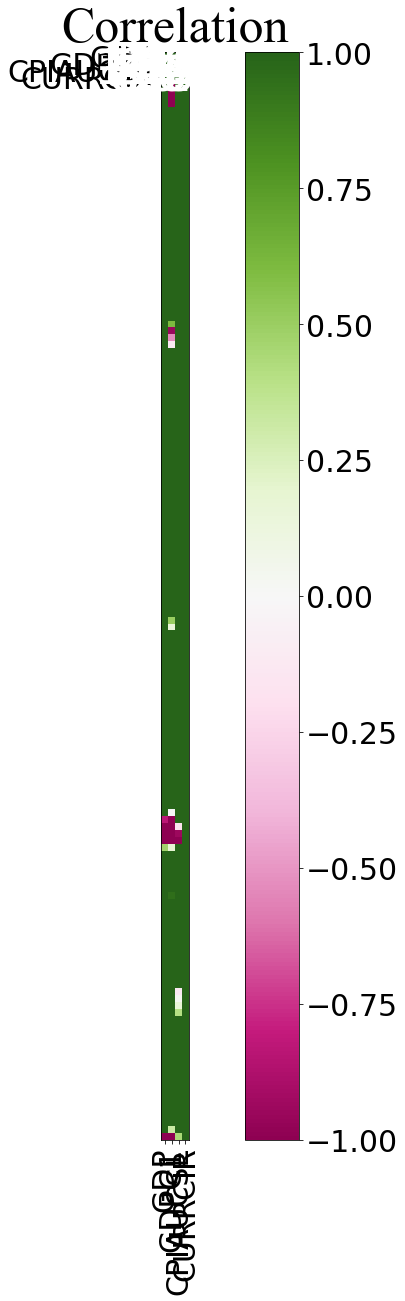

In [21]:
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("GDP.pdf")

def corr_matrix_heatmap(data, pp):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20),subplot_kw = {'aspect': 'equal'})  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "PiYG")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size})
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",  
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors
    cbar = fig.colorbar(im)
    plt.show()
    pp.savefig(fig, bbox_inches="tight")
    plt.close()

corr_matrix_heatmap(select_data, pp)
pp = PdfPages("GDP.pdf")


#### 3. Download data for 1 Year, 2 Year, 5 Year, 10 Year, and 30 Year U.S. Treasuries (Constant Maturity Rates). Create a function that creates a yield for each date.

In [22]:
# Treasury yield is the return on investment, expressed as a percentage, on the U.S. government's debt obligations.
# Treasury yields don't just influence how much the government pays to borrow and how much investors earn by buying government bonds. 
# They also influence the interest rates that individuals and businesses pay to borrow money to buy real estate, vehicles, and equipment.
# Treasury yields also tell us how investors feel about the economy. 
# The higher the yields on 10-, 20- and 30-year Treasuries, the better the economic outlook.

In [23]:
import os
import pandas
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import datetime
import math

In [24]:
TY_codes  = {"1 Y (%)": "DGS1",
               "2 Y (%)": "DGS2",
               "5 Y (%)": "DGS5",
               "10 Y (%)": "DGS10",
               "30 Y (%)": "DGS30"}
               
start = datetime.datetime(1999, 1, 1)
end = datetime.datetime.today()

TY_Data = gather_data(TY_codes, start = start, end = end, freq = "M").dropna()
TY_Data["30 Y - 1 Y"] = TY_Data["30 Y (%)"].sub(TY_Data["1 Y (%)"])
TY_Data

,1 Y (%),2 Y (%),5 Y (%),10 Y (%),30 Y (%),30 Y - 1 Y
DATE,,,,,,
1999-01-31,4.514211,4.615263,4.600526,4.722105,5.157895,0.643684
1999-02-28,4.702632,4.876316,4.914737,4.998947,5.365263,0.662632
1999-03-31,4.781304,5.053043,5.140435,5.232609,5.580435,0.799130
1999-04-30,4.690000,4.976818,5.079545,5.184545,5.547727,0.857727
1999-05-31,4.849000,5.254500,5.437000,5.539500,5.805500,0.956500
...,...,...,...,...,...,...
2020-06-30,0.176364,0.185000,0.344545,0.728636,1.493636,1.317273
2020-07-31,0.145455,0.148182,0.278636,0.623636,1.310455,1.165000
2020-08-31,0.130476,0.139524,0.266667,0.650000,1.358095,1.227619


In [25]:
# Create a function that creates a yield for each date.

In [26]:
def plot_lines(df, title = False, linewidth = 1, figsize = (40,20), full_index = False, 
               h_line = False, max_y = False, legend = True, pp = None, show_inversion = False):
    fig, ax = plt.subplots(figsize = figsize)
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
    if h_line != False:
        ax.axhline(h_line, ls = "--", linewidth = 1.5, color = "k")
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    if max_y != False:
        ax.set_ylim(bottom = 0, top = max_y)
    if full_index:
        plt.xticks([i for i in range(len(df.index))], list(df.index))
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 

    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 
    if title != False:
        plt.title(title, fontsize = 72)

    if show_inversion:
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        ax.fill_between(df.index, 0, df.max().max(), where=df["5 Y (%)"] < df["1 Y(%)"],
                    facecolor='red', alpha=0.2, transform = trans)
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    plt.savefig(filename[:50] + " line.png",
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

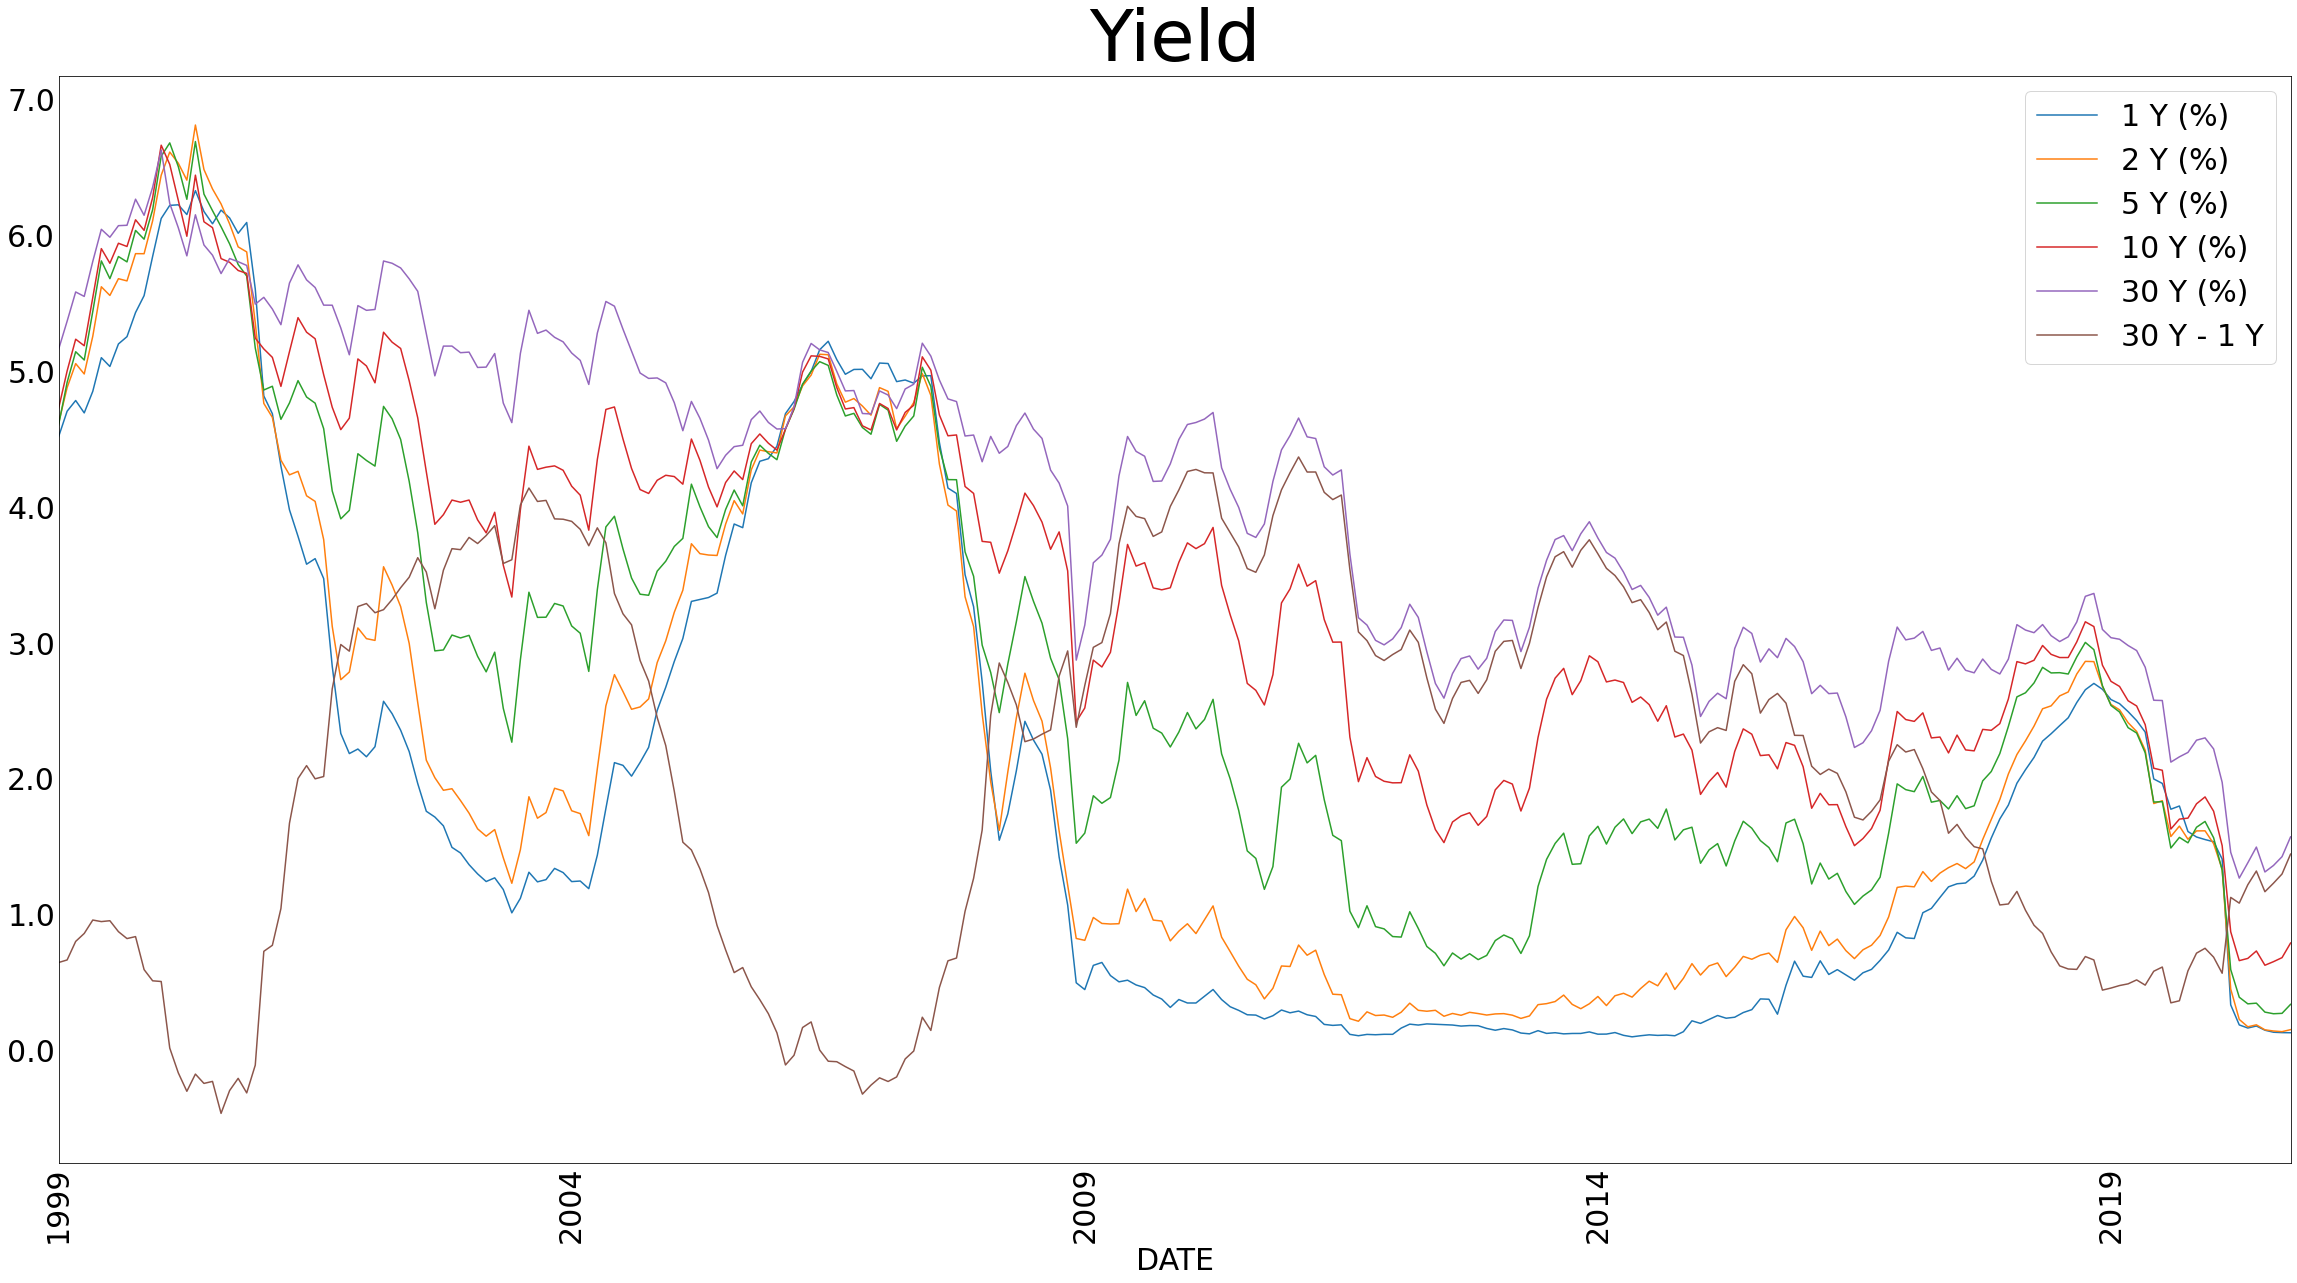

In [27]:
plot_lines(df = TY_Data,title = "Yield", linewidth = 1.5, figsize = (40, 20), pp = None)
plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.ymargin'] = 0


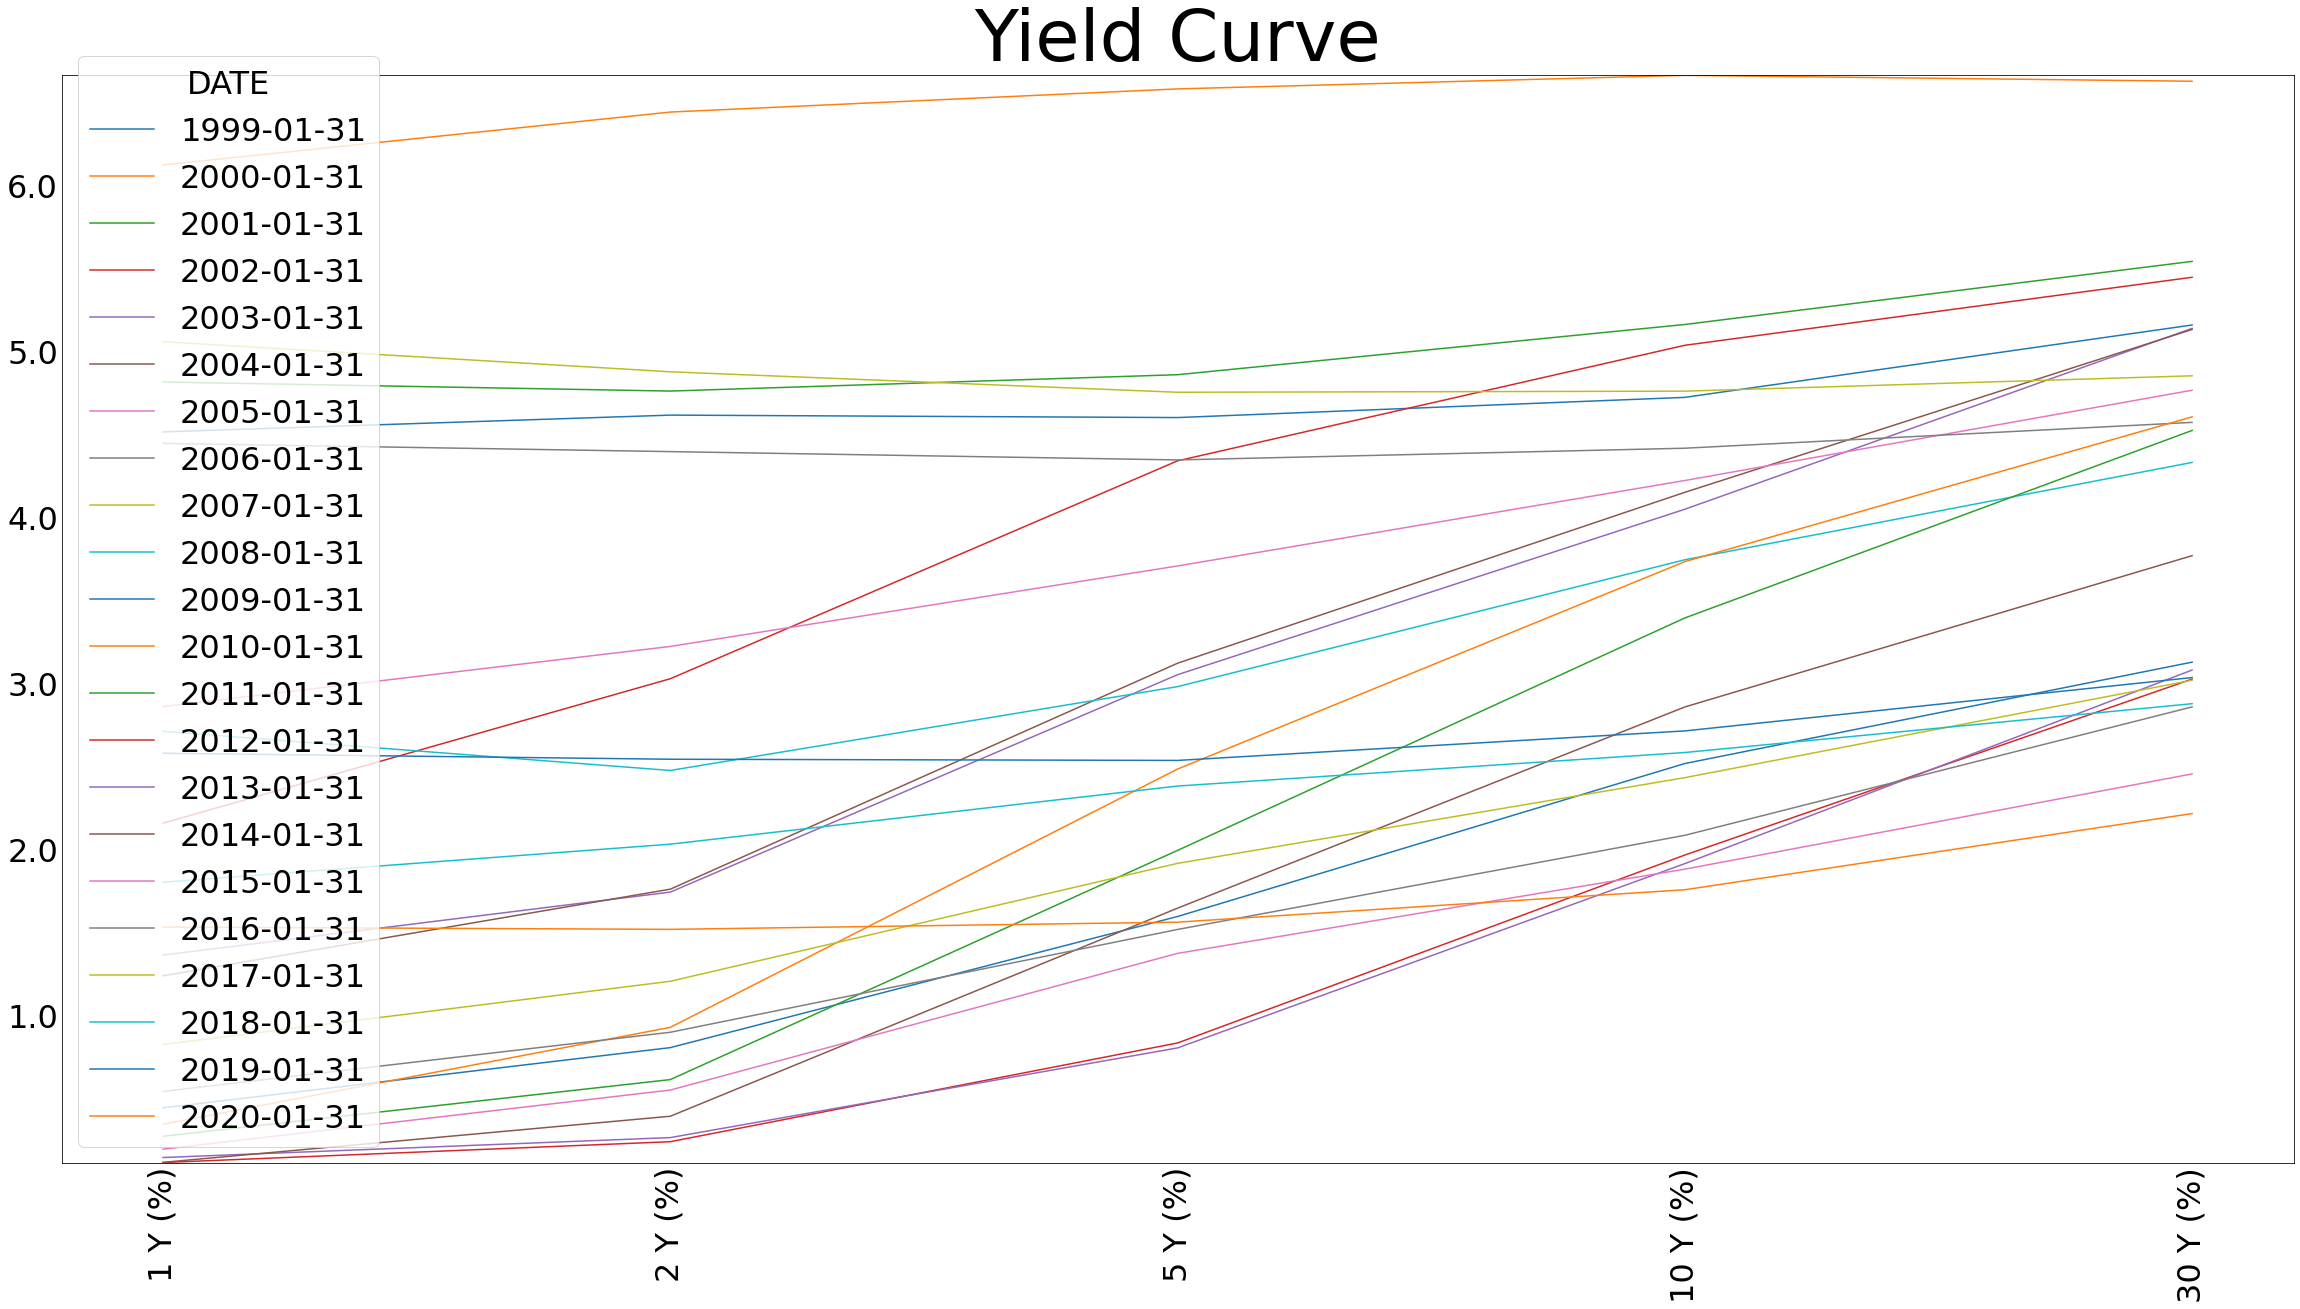

In [28]:
# rename the dataframe 
T_data = TY_Data.T
T_data.rename(columns={name : str(name)[:10] for name in T_data.keys()}, inplace = True)
keys = list(T_data.keys())
# Plot all maturities, remove "30 Y - 1 Y" dataframe
T_data_trunc = T_data[keys[::12]].drop("30 Y - 1 Y")

max_y = T_data.max().max()
#for key, val in T_data_trunc.items():
plot_lines(df = T_data_trunc, title = "Yield Curve", linewidth = 1.5, 
           figsize = (40, 20), full_index = True, legend = True, pp = None)

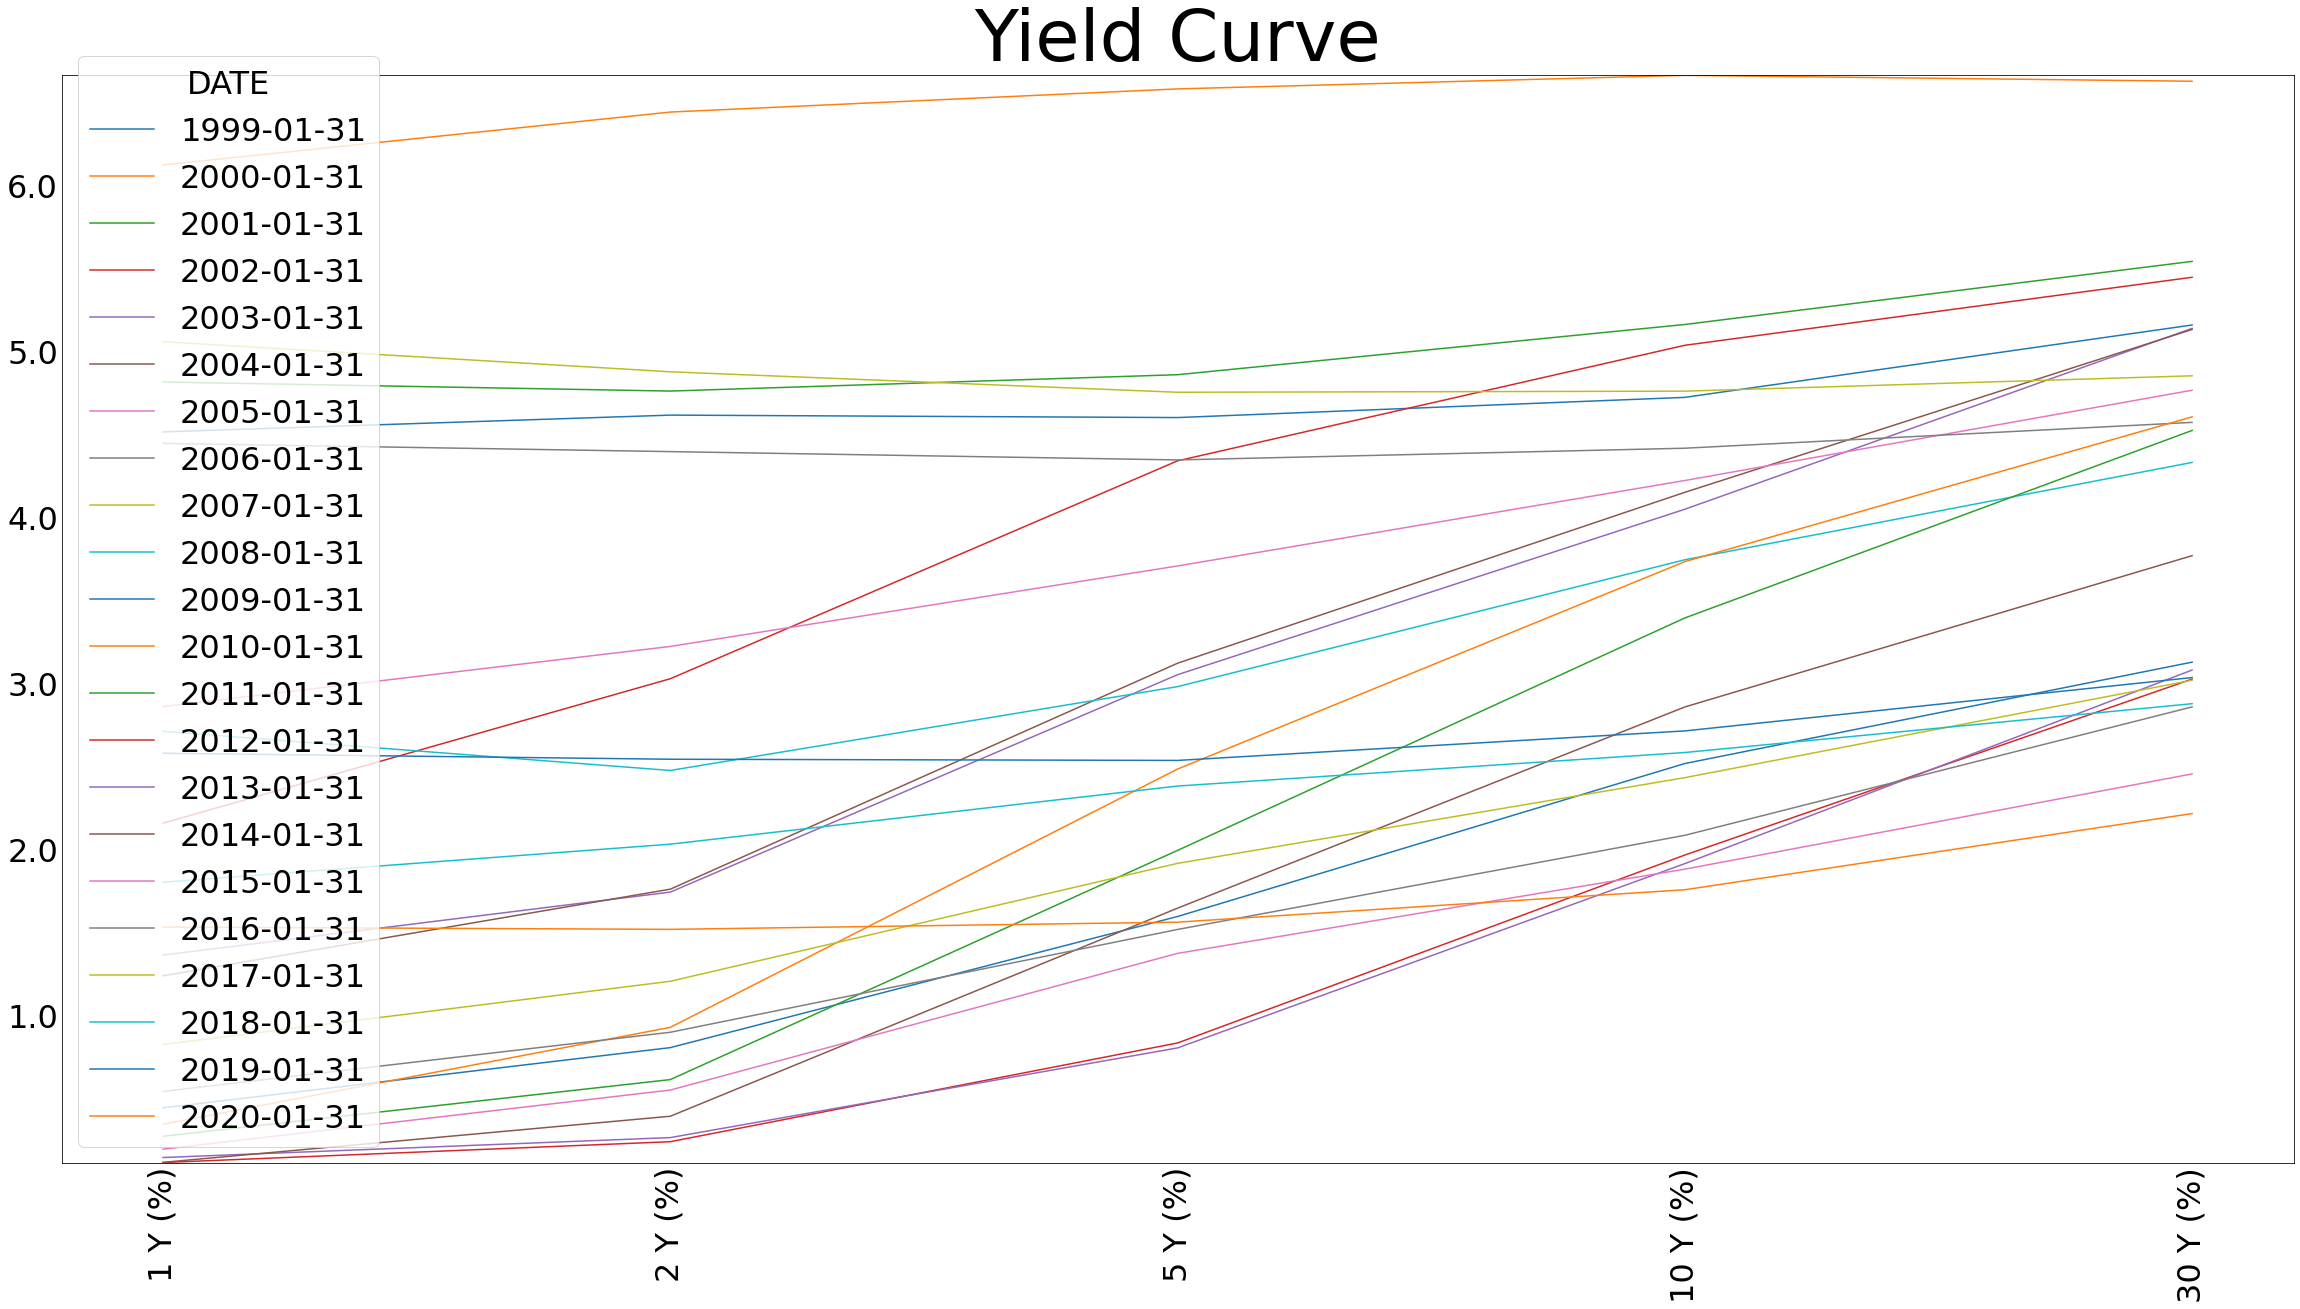

In [29]:
# save both graphs in a single pdf file
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("Yield_Curves.pdf")
plot_lines(df = T_data_trunc, title = "Yield Curve", linewidth = 1.5, 
           figsize = (40, 20), full_index = True, legend = True, pp = pp)
plot_lines(df = TY_Data,title = "Yield", linewidth = 1.5, figsize = (40, 20), pp = pp)

plt.close()
pp.close()

In [35]:
from matplotlib.animation import FuncAnimation
# pip install ffmpeg-python
import math         
def plot_curves(date, *kwargs):
    #ax.clear()
    ax.set_ylim(bottom = 0, top = max_y)
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals])
 
    # the FuncAnimation cycles from 0 to i frames,
    plot_df = df[date]
    alpha = 1 if date in write_dates else .1
    color = "C" + str(math.ceil(int(date[5:7])/3)) if date != write_dates[0] else "k"

    # If no secondary_y (axis), plot all variables at once

    plot_df.plot.line(linewidth = linewidth, ax = ax, alpha = alpha, color = color)
    if date in write_dates: 
        plt.text(len(plot_df.keys()) - 1, plot_df["30 Y (%)"], date[5:], color = color)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(str(date)[:10] + "\n" + "Yield Curve (U.S. Treasuries)", fontsize = 30)
    print(date)
    
def init(*kwargs):
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    plt.xticks([i for i in range(len(data.index))], list(data.index))
    ax.tick_params(axis='x', rotation=90)
    # transform y-axis values from sci notation to integers
    ax.set_ylim(bottom = 0, top = max_y)
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals])

dates = list(T_data.keys())[-166:]
write_dates = dates[-1:0:-20]
df = T_data[dates].drop("30 Y - 1 Y", axis = 0)
max_y = df.max().max()
fig, ax = plt.subplots(figsize=(40,20))   
plt.rcParams.update({"font.size": 30})
linewidth = 5
# the functions will unpack the tuple. The same names variable names
# are used in the function
kwargs = (df, fig, ax, max_y, linewidth, write_dates)
frames = dates
anim = FuncAnimation(fig, plot_curves, frames = frames, 
                     blit = False, init_func = init, interval=100, 
                     fargs =kwargs)
# Use the next line to save the video as an MP4.
anim.save("TreasuriesYieldCurve.gif", writer = "pillow")
plt.close()

2007-01-31
2007-02-28
2007-03-31
2007-04-30
2007-05-31
2007-06-30
2007-07-31
2007-08-31
2007-09-30
2007-10-31
2007-11-30
2007-12-31
2008-01-31
2008-02-29
2008-03-31
2008-04-30
2008-05-31
2008-06-30
2008-07-31
2008-08-31
2008-09-30
2008-10-31
2008-11-30
2008-12-31
2009-01-31
2009-02-28
2009-03-31
2009-04-30
2009-05-31
2009-06-30
2009-07-31
2009-08-31
2009-09-30
2009-10-31
2009-11-30
2009-12-31
2010-01-31
2010-02-28
2010-03-31
2010-04-30
2010-05-31
2010-06-30
2010-07-31
2010-08-31
2010-09-30
2010-10-31
2010-11-30
2010-12-31
2011-01-31
2011-02-28
2011-03-31
2011-04-30
2011-05-31
2011-06-30
2011-07-31
2011-08-31
2011-09-30
2011-10-31
2011-11-30
2011-12-31
2012-01-31
2012-02-29
2012-03-31
2012-04-30
2012-05-31
2012-06-30
2012-07-31
2012-08-31
2012-09-30
2012-10-31
2012-11-30
2012-12-31
2013-01-31
2013-02-28
2013-03-31
2013-04-30
2013-05-31
2013-06-30
2013-07-31
2013-08-31
2013-09-30
2013-10-31
2013-11-30
2013-12-31
2014-01-31
2014-02-28
2014-03-31
2014-04-30
2014-05-31
2014-06-30
2014-07-31

#### 4.Plot all of the variables from (3) in a single time series line plot. Indicate using shaded regions any period where the 5 Year rate is less than the 1 year rate. Save this plot in the same pdf that you used in (3).¶

In [31]:
def plot_lines(df, title = False, linewidth = 1, figsize = (40,20), full_index = False, 
               h_line = False, max_y = False, legend = True, pp = None, show_inversion = False):
    fig, ax = plt.subplots(figsize = figsize)
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
    if h_line != False:
        ax.axhline(h_line, ls = "--", linewidth = 1.5, color = "k")
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    if max_y != False:
        ax.set_ylim(bottom = 0, top = max_y)
    if full_index:
        plt.xticks([i for i in range(len(df.index))], list(df.index))
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 

    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 
    if title != False:
        plt.title(title, fontsize = 72)

    if show_inversion:
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        ax.fill_between(df.index, 0, df.max().max(), where=df["5 Y (%)"] < df["1 Y (%)"],
                    facecolor='red', alpha=0.2, transform = trans)
          # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    plt.savefig(filename[:50] + " line.png",
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")
  

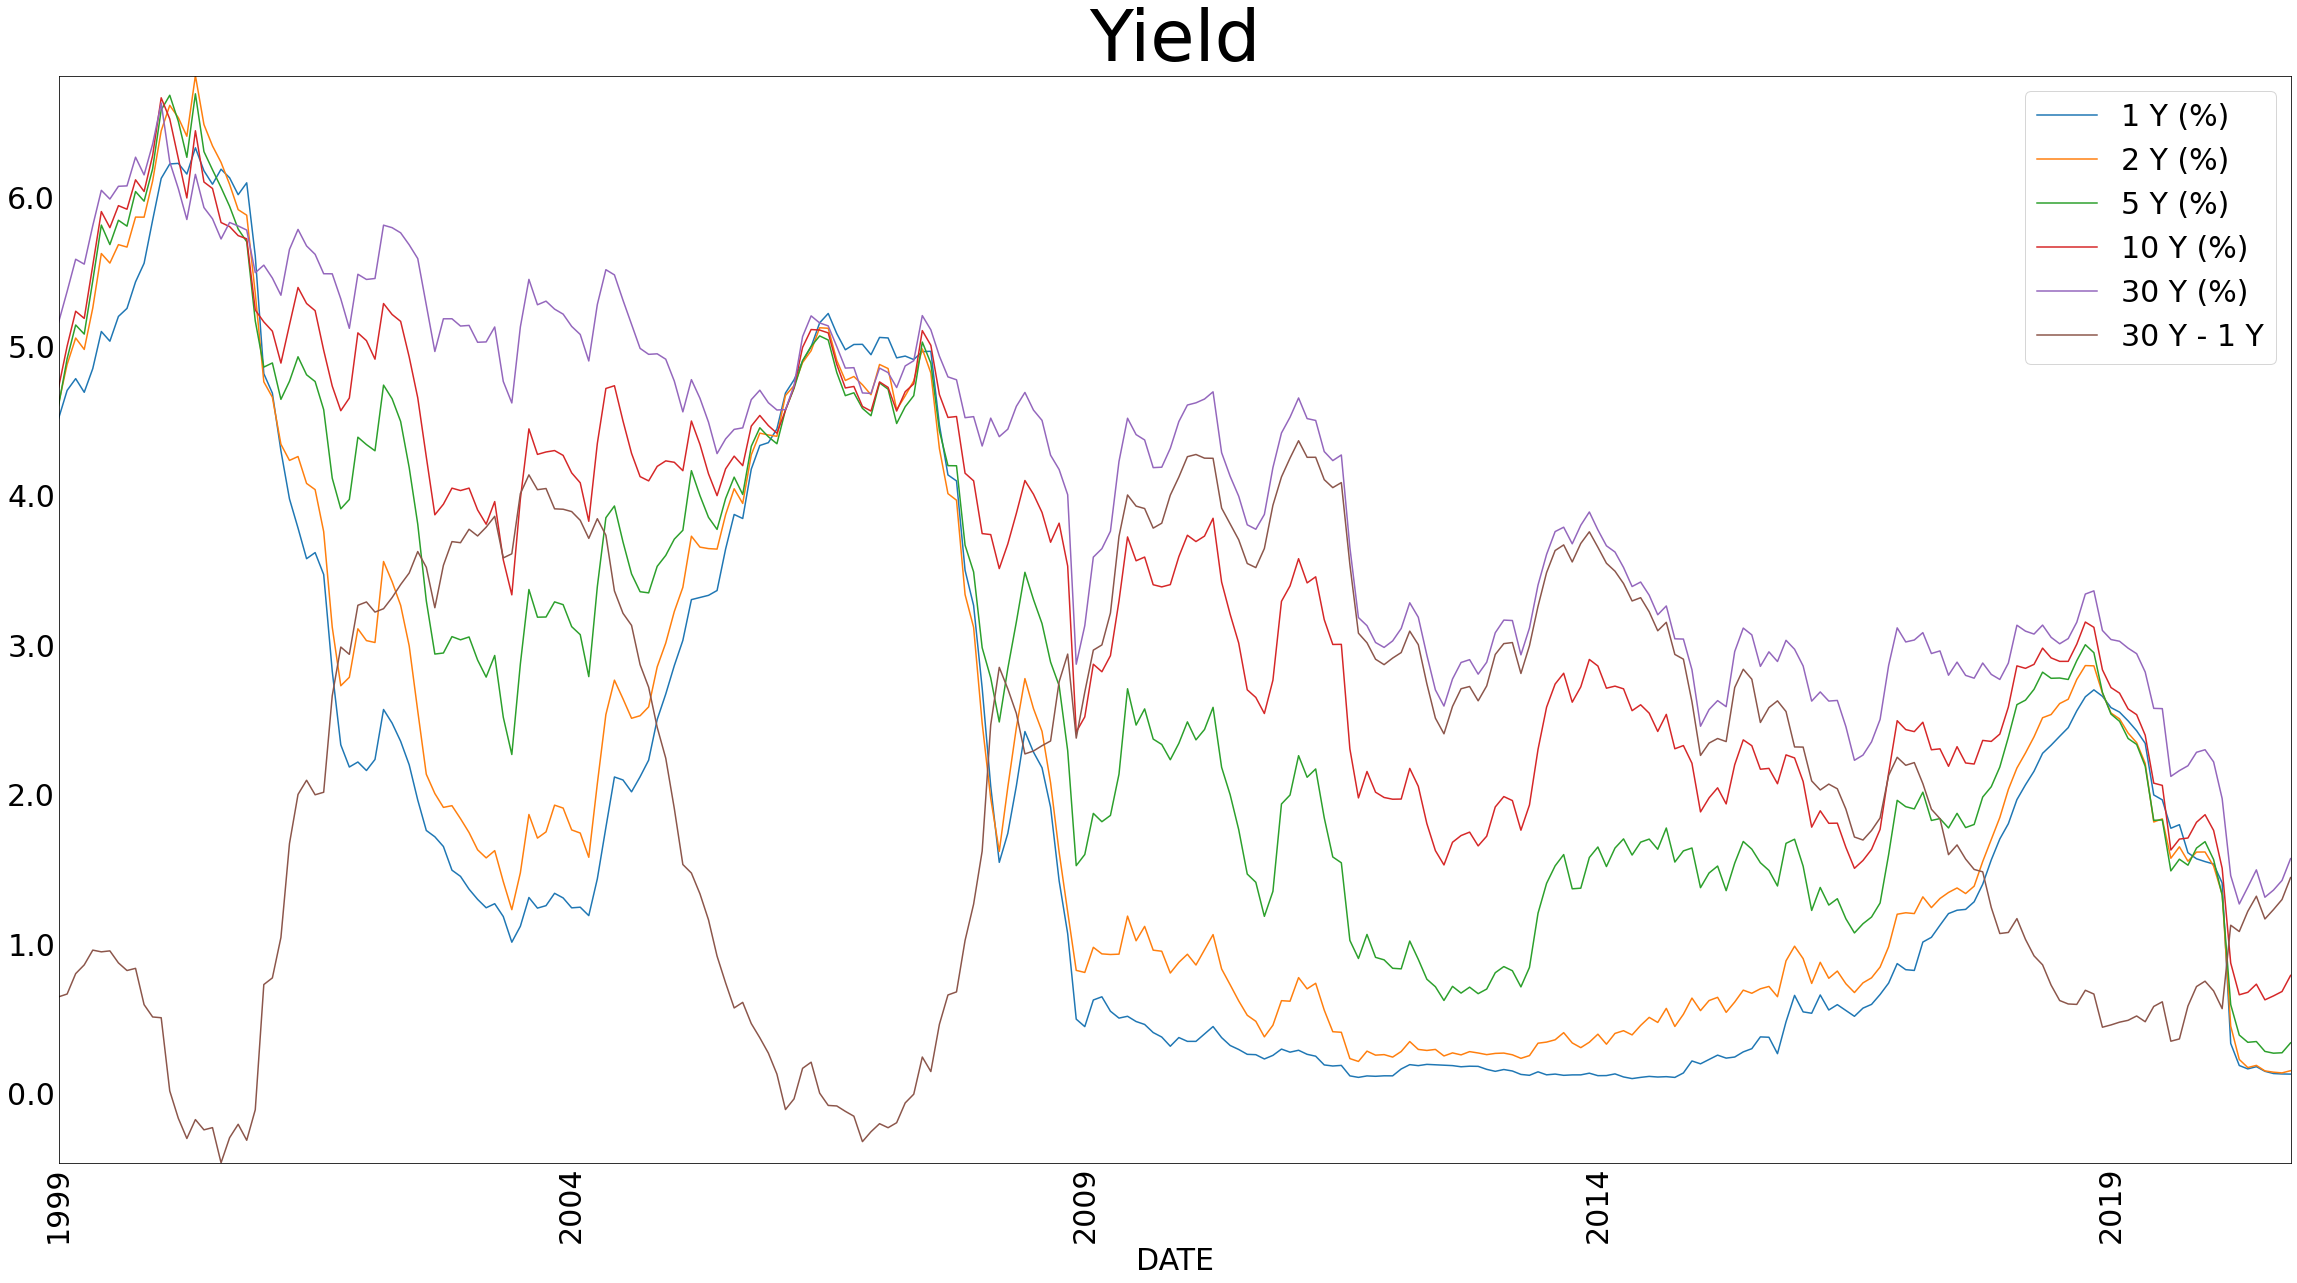

In [32]:
plot_lines(df = TY_Data,title = "Yield", linewidth = 1.5, figsize = (40, 20), pp = None)
plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.ymargin'] = 0